# Maskinlæring

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lese dataene
iris = pd.read_csv("Datafiler/iris.csv")

### Utforsking av datasettet

In [3]:
# Skriver ut fem første linjer
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualiseringer
La oss først visualisere noen sammenhenger som kan gi oss noen hypoteser.

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

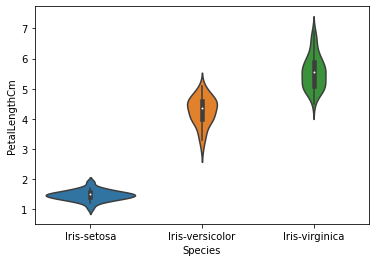

In [4]:
#sns.regplot(data=iris, x='SepalLengthCm',y="PetalLengthCm")
#sns.histplot(data=iris, x="PetalLengthCm")
#sns.jointplot(data=iris, x="SepalLengthCm", y="PetalLengthCm", hue="Species")
sns.violinplot(data=iris, x='Species', y="PetalLengthCm")

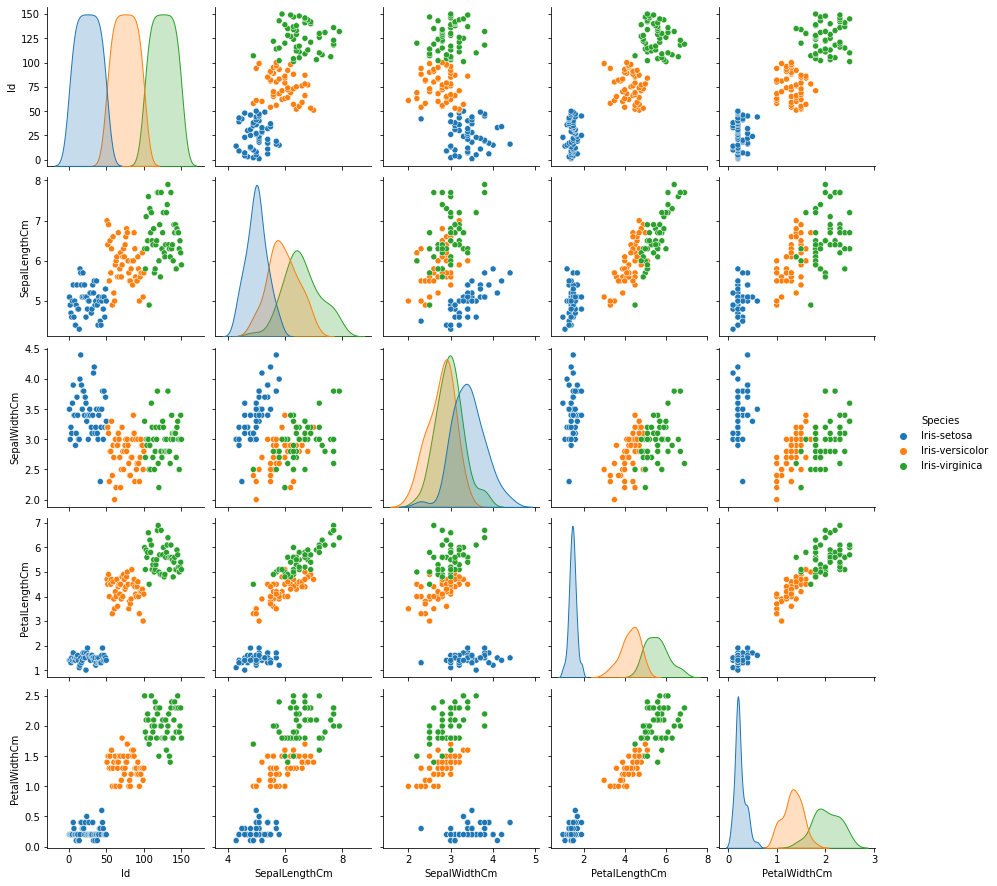

In [5]:
sns.pairplot(data=iris, hue="Species")

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Maskinlæring
Plottene ovenfor kan si oss noe om at beger- og kronbladlengden for ulike irisblomstarter er forskjellig. Vi skal nå lage en modell som kan forutsi hvilken art vi har med å gjøre gitt ulike bredder og lengder av kron- og begerblad. Vi velger ut hvilke data vi ønsker å bruke som kriterium for arten, spesifiserer kategorien "species" som målkategorien vår:

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
kriterier = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # features
kategorier = iris['Species'] # labels

I maskinlæring er det viktig at modellen vår klarer å forutsi data som kommer utenfra datasettet vi trener modellen med. Derfor deler vi ofte opp dataene i et treningssett og et testsett. Treningssettet bruker vi til å trene modellen, testsettet til å teste og evaluere modellen i etterkant. Vi blander ikke disse dataene. Vi kan generere slike data med funksjonen _train\_test\_split()_. Her bruker vi 80 \% av dataene til trening og 20 \% til testing. Du bør bruke minst 70 \% av dataene dine til trening.

In [9]:
testandel = 0.2 # Andel brukt til testing
ml_data = train_test_split(kriterier, kategorier, test_size=testandel, random_state=42)

treningskriterier = ml_data[0]
testkriterier = ml_data[1]
treningskategorier = ml_data[2]
testkategorier = ml_data[3]

Nå kan vi lage modellen vår. Vi bruker en algoritme som heter _Decision Tree Classifier_. Det er basert på sammensatte og forgreinede valgtrær, der alle kombinasjoner av kriterier blir utforsket. Betingede sannsynligheter for ulike hendelser blir beregnet, og de mest sannsynlige utfallene blir framhevet basert på kombinasjonen av kriteriene. Først trener vi modellen:

In [10]:
modell = tree.DecisionTreeClassifier()
modell.fit(treningskriterier, treningskategorier)

DecisionTreeClassifier()

Det var det - da har vi en modell! Den ligger nå i et objekt som vi har kalt _modell_. La oss sjekke hvordan modellen takler testsettet vårt.

## Test og validering av modellen

In [11]:
modellkategorier_forutsett = modell.predict(testkriterier)
accuracy_score(testkategorier, modellkategorier_forutsett)

1.0

For å få bedre oversikt over hva modellen forutsier riktig og hva den feiler på, kan vi konstruere en såkalt "Confusion Matrix" (forvirringsmatrise/feilmatrise):

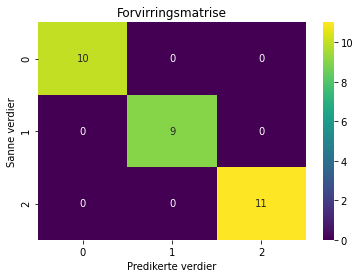

In [12]:
cm = confusion_matrix(modellkategorier_forutsett, testkategorier)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='viridis')
plt.title("Forvirringsmatrise")
plt.xlabel("Predikerte verdier")
plt.ylabel("Sanne verdier")
plt.show()

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


La oss helt til sist visualisere modellen vår.

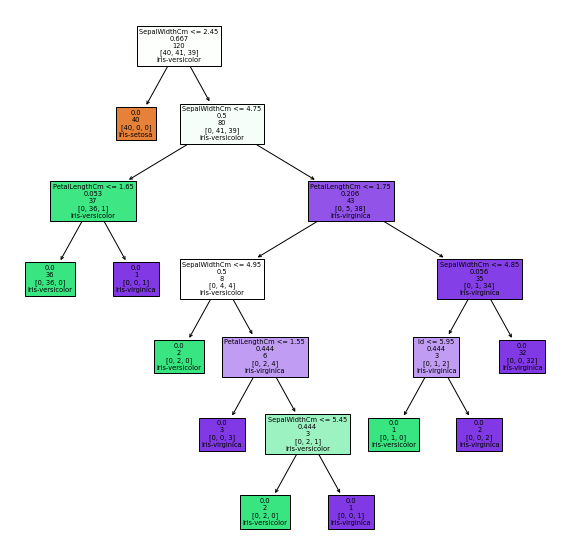

In [14]:
plt.figure(figsize=(10,10))
tree.plot_tree(modell,feature_names=iris.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True,label=None) 
None

## KNN-modell
K-nearest neighbor.

In [15]:
from sklearn import neighbors, metrics

In [16]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [17]:
knn.fit(treningskriterier, treningskategorier) # features, labels

KNeighborsClassifier(n_neighbors=20)

In [18]:
prediksjon_knn = knn.predict(testkriterier)
presisjon_knn = metrics.accuracy_score(testkategorier, prediksjon_knn)
print("Presisjon: ", presisjon_knn)

Presisjon:  1.0


In [19]:
# Bruker modellen på en tilfeldig valgt blomst
t1 = [[6.1, 2.8, 4.9, 1.1]]
#t2 = np.random.uniform(0,15,(100,4))*np.ones([100,4])
prediksjon = knn.predict(t1)
print(prediksjon)

['Iris-versicolor']


## SVM-modell
Support vector machine-modell.

In [20]:
from sklearn import svm

In [21]:
svm_modell = svm.SVC()
svm_modell.fit(treningskriterier, treningskategorier)

SVC()

In [22]:
prediksjon_svm = svm_modell.predict(testkriterier)
presisjon_svm = accuracy_score(testkategorier, prediksjon_svm)
print("Presisjon: ", presisjon_svm)

Presisjon:  1.0


## K-means cluster

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.datasets import load_breast_cancer

In [24]:
#bc = load_breast_cancer()
#x = bc.data
#y = bc.target
bc = pd.read_csv("Datafiler/brystkreft.csv")
bc.head()
bc.pop("id")

x = bc[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

diagnose = {"M": 0, "B": 1}
bc['diagnosis'] = bc['diagnosis'].map(diagnose)

y = bc['diagnosis']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testandel)

modell_kmeans = KMeans(n_clusters=2, random_state=42)

In [26]:
modell_kmeans.fit(x_train)

KMeans(n_clusters=2, random_state=42)

In [27]:
prediksjon_kmeans = modell_kmeans.predict(x_test)
labels = modell_kmeans.labels_
presisjon_kmeans = accuracy_score(y_test, prediksjon_kmeans)
print("Presisjon: ", presisjon_kmeans)

Presisjon:  0.8596491228070176


## Regresjonsmodeller

In [28]:
from sklearn import linear_model

In [29]:
kriterier_lr = iris[['SepalLengthCm']]# features
kategorier_lr = iris['PetalLengthCm'] # labels

ml_data_lr = train_test_split(kriterier_lr, kategorier_lr, test_size=testandel, random_state=42)

treningskriterier_lr = ml_data_lr[0]
testkriterier_lr = ml_data_lr[1]
treningskategorier_lr = ml_data_lr[2]
testkategorier_lr = ml_data_lr[3]

In [30]:
l_reg = linear_model.LinearRegression()
linreg_modell = l_reg.fit(treningskriterier_lr, treningskategorier_lr)

In [31]:
prediksjon_linreg = linreg_modell.predict(testkriterier_lr)
R2_verdi = l_reg.score(kriterier_lr, kategorier_lr)
stigning = l_reg.coef_
skjæring = l_reg.intercept_
print("Presisjon: ", R2_verdi)

Presisjon:  0.7595012769586207


# Nevrale nettverk

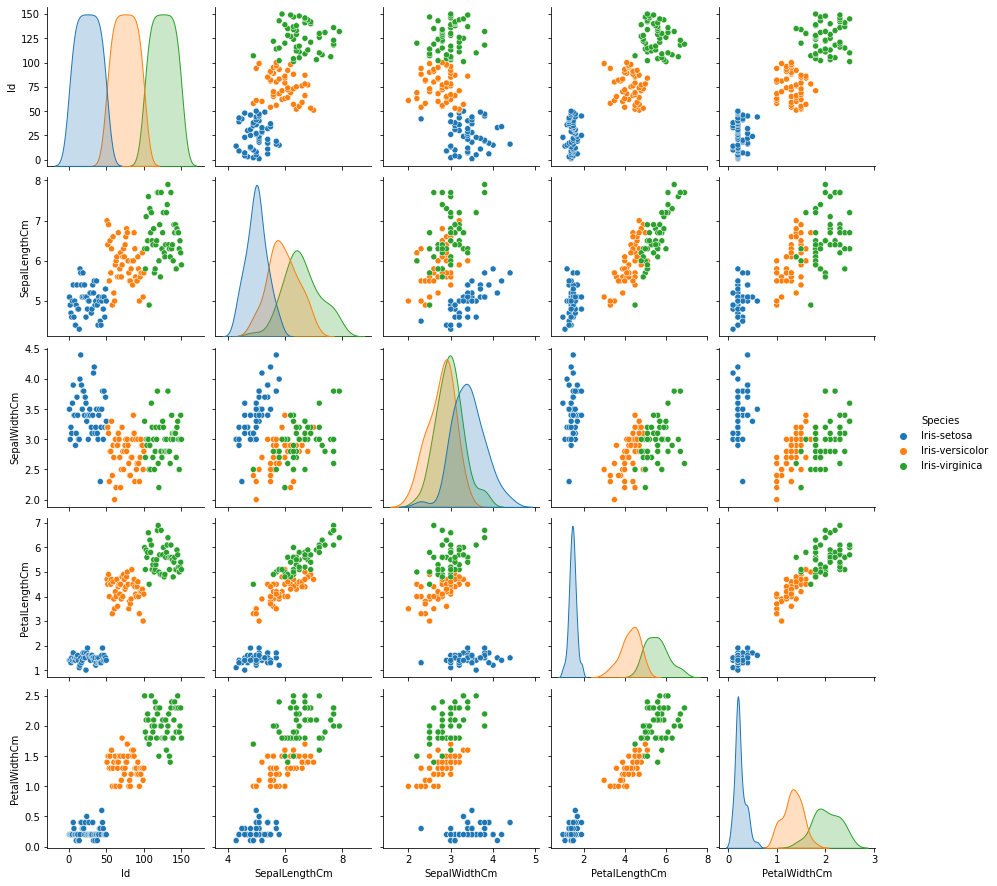

In [32]:
sns.pairplot(data=iris, hue='Species')

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [34]:
modell = Sequential()
modell.add(Dense(units=1, activation='linear', input_shape=[1,]))

In [35]:
læringsrate = 0.1  # Hvor fort modellen skal lære
modell.compile(optimizer=Adam(læringsrate), loss = 'mse') # Optimizer = metode for å minimere loss
modell.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [36]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
x = iris["PetalLengthCm"]
y = iris["PetalWidthCm"]
modell.fit(x, y, epochs = 500, validation_split=0.2)

Epoch 1/500
4/4 [==============================] - 1s 259ms/step - loss: 12.7000 - val_loss: 8.7175
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 3.1857 - val_loss: 0.5209
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1834 - val_loss: 1.0541
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8373 - val_loss: 2.6848
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 1.4279 - val_loss: 1.9636
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8666 - val_loss: 0.5318
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2094 - val_loss: 0.1158
Epoch 8/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0971 - val_loss: 0.4665
Epoch 9/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2577 - val_loss: 0.5435
Epoch 10/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2737 - val_loss: 0.2443
Epoch 11/500
4/4 [========

4/4 [==============================] - 0s 8ms/step - loss: 0.0243 - val_loss: 0.1079
Epoch 85/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0214 - val_loss: 0.1102
Epoch 86/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0317 - val_loss: 0.1092
Epoch 87/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0297 - val_loss: 0.1146
Epoch 88/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0259 - val_loss: 0.1137
Epoch 89/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0290 - val_loss: 0.1072
Epoch 90/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0266 - val_loss: 0.1058
Epoch 91/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0239 - val_loss: 0.1194
Epoch 92/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0253 - val_loss: 0.1033
Epoch 93/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0267 - val_loss: 0.1026
Epoch 94/500
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 0.0313 - val_loss: 0.1114
Epoch 168/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0253 - val_loss: 0.1109
Epoch 169/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0326 - val_loss: 0.1125
Epoch 170/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0302 - val_loss: 0.1073
Epoch 171/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0267 - val_loss: 0.1115
Epoch 172/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0294 - val_loss: 0.1126
Epoch 173/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0247 - val_loss: 0.1085
Epoch 174/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0298 - val_loss: 0.1061
Epoch 175/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0246 - val_loss: 0.1121
Epoch 176/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0283 - val_loss: 0.1085
Epoch 177/500
4/4 [===

Epoch 250/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.1051
Epoch 251/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0308 - val_loss: 0.1023
Epoch 252/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.1234
Epoch 253/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0306 - val_loss: 0.1027
Epoch 254/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0319 - val_loss: 0.1039
Epoch 255/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0251 - val_loss: 0.1274
Epoch 256/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0260 - val_loss: 0.0990
Epoch 257/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0287 - val_loss: 0.1044
Epoch 258/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0271 - val_loss: 0.1144
Epoch 259/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0217 - val_loss: 0.1168
Epoch 260/

4/4 [==============================] - 0s 9ms/step - loss: 0.0248 - val_loss: 0.1095
Epoch 333/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0277 - val_loss: 0.1096
Epoch 334/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0248 - val_loss: 0.1073
Epoch 335/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0285 - val_loss: 0.1109
Epoch 336/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0243 - val_loss: 0.1239
Epoch 337/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0319 - val_loss: 0.1028
Epoch 338/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0304 - val_loss: 0.1170
Epoch 339/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0303 - val_loss: 0.1131
Epoch 340/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0262 - val_loss: 0.0999
Epoch 341/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0304 - val_loss: 0.1167
Epoch 342/500
4/4 [=====

Epoch 415/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0232 - val_loss: 0.1140
Epoch 416/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.1037
Epoch 417/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 0.1057
Epoch 418/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0265 - val_loss: 0.1248
Epoch 419/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0258 - val_loss: 0.1063
Epoch 420/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0339 - val_loss: 0.1056
Epoch 421/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0311 - val_loss: 0.1180
Epoch 422/500
4/4 [==============================] - 0s 8ms/step - loss: 0.0309 - val_loss: 0.1066
Epoch 423/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0239 - val_loss: 0.1056
Epoch 424/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0245 - val_loss: 0.1080
Epoch 425/

4/4 [==============================] - 0s 9ms/step - loss: 0.0296 - val_loss: 0.0943
Epoch 498/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0253 - val_loss: 0.1318
Epoch 499/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0295 - val_loss: 0.0964
Epoch 500/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0264 - val_loss: 0.1196


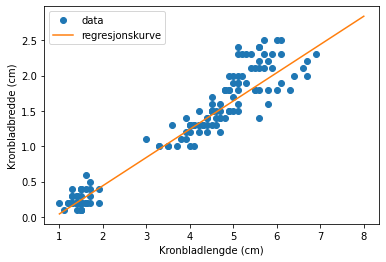

In [38]:
x_fit = np.linspace(1, 8, 100)
y_fit = modell.predict(x_fit)
plt.plot(x, y, linestyle = ' ', marker = 'o', label = 'data')
plt.plot(x_fit, y_fit, label = 'regresjonskurve')
plt.xlabel("Kronbladlengde (cm)")
plt.ylabel("Kronbladbredde (cm)")
plt.legend()
plt.savefig("regresjonsdata_iris.pdf")

# Bestemmelse av art

In [39]:
iris["Species"] = iris["Species"].map({"Iris-setosa": 0, 
                                       "Iris-versicolor": 1, "Iris-virginica": 2})

In [40]:
kriterier = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
kategorier = iris['Species']

<AxesSubplot:>

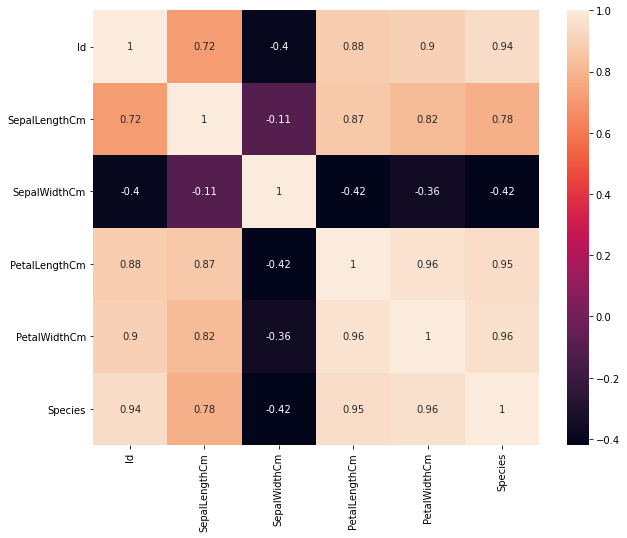

In [41]:
plt.figure(figsize=(10,8))
corr = iris.corr()
sns.heatmap(corr, annot = True)